# Imports & Initialisation

In [1]:
!pip install --upgrade scipy

import numpy

from os import listdir
import csv

from scipy.stats import pearsonr
from scipy.stats import ttest_1samp

import matplotlib.pylab as plt

     |████████████████████████████████| 27.4MB 154kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


# Import surprisal lists
Import surprisal lists from the GPT-2 and Transformer-XL notebooks

In [2]:
sliceSurprisalListGPT2 = {}
sliceSurprisalListTranformerXL = {}

# Load files into dict objects 
file  = open('/content/drive/MyDrive/Project Files/GPT-2 Output.txt', 'r')
reader = csv.reader(file)
sliceSurprisalListGPT2 = {rows[0]:rows[1] for rows in reader}

file  = open('/content/drive/MyDrive/Project Files/Transformer-XL Output.txt', 'r')
reader = csv.reader(file)
sliceSurprisalListTranformerXL = {rows[0]:rows[1] for rows in reader}

# Remove any NaN values
for key, value in sliceSurprisalListGPT2.items():
  if value == 'nan':
    sliceSurprisalListGPT2[key] = 0

for key, value in sliceSurprisalListTranformerXL.items():
  if value == 'nan':
    sliceSurprisalListTranformerXL[key] = 0

floatSurprisalListGPT2 = numpy.fromiter(sliceSurprisalListGPT2.values(), dtype=float)
floatSurprisalListTransformerXL = numpy.fromiter(sliceSurprisalListTranformerXL.values(), dtype=float)

# Print
print(sliceSurprisalListGPT2)
print(sliceSurprisalListTranformerXL)

{'20': '9.745940361771238', '22': '7.646552148964156', '24': '10.940793198915976', '26': '10.156024142867249', '28': '10.769647178022803', '30': '8.38341963619853', '32': '11.104883971566947', '34': '14.900995139618136', '36': '8.50841378427835', '38': '15.72531203407807', '40': '12.218517214686052', '42': '15.044602042555114', '44': '12.162690158901404', '46': '14.067289358537096', '48': '7.763335398270794', '50': '9.919706019680218', '52': '8.461205172284068', '54': '16.043565258703282', '56': '10.118237397300136', '58': '19.321989343509017', '60': '8.754032464369317', '62': '13.410057004007081', '64': '8.019773851956861', '66': '11.331378339708703', '68': '7.266000266240236', '70': '14.380413258483042', '72': '10.416029033275516', '74': '9.285544213651477', '76': '3.804399355530844', '78': '9.478274850867786', '80': '10.252015118821657', '82': '3.7378076376003775', '84': '9.693657618721904', '86': '16.07188603919215', '88': '14.221176600825897', '90': '9.886685457365429', '92': '10.

# Import MRI Images & Correlate
Import MRI data & perform a Pearson correlation with both langauge models

In [3]:
inputImageFilePath = "/content/drive/MyDrive/Project Files/MRI Array Files"
inputMaskFilePath = "/content/drive/MyDrive/Project Files/MRI Array Files Masks"

allFileNames = listdir(inputImageFilePath)
MRIImages = []
MRIMasks = []

allCorrelations = []

for fileName in allFileNames:
  image = numpy.load(inputImageFilePath + "/" + fileName)
  mask = numpy.load(inputMaskFilePath + "/" + fileName)

  imageShape = image.shape
  subject = fileName[:6]

  # Hold correlation coefficients
  correlationMatrixGPT2 = []
  correlationMatrixTransformerXL = []

  # Loop through every voxel
  for i in range(imageShape[0]):
    iArrayGPT2 = []
    iArrayTransformerXL = []

    for j in range(imageShape[1]):
      jArrayGPT2 = []
      jArrayTransformerXL = []
      
      for k in range(imageShape[2]):

        # Correlate from time point 12 (14 seconds into scan) onwards to allow for delay.
        # Language models are stopped at time point 360 to ensure both lists are the same size
        activationValues = image[i, j, k, 12:]

        # Only correlate on voxels indicated by the mask
        if mask[i, j, k, 10] == 1:
          correleationGPT2 = pearsonr(activationValues, floatSurprisalListGPT2[:360])[0]
          correleationTransformerXL = pearsonr(activationValues, floatSurprisalListTransformerXL[:360])[0]
        else:
          correleationGPT2 = numpy.NaN
          correleationTransformerXL = numpy.NaN

        jArrayGPT2.append(correleationGPT2)
        jArrayTransformerXL.append(correleationTransformerXL)

      iArrayGPT2.append(jArrayGPT2)
      iArrayTransformerXL.append(jArrayTransformerXL)

    correlationMatrixGPT2.append(iArrayGPT2)
    correlationMatrixTransformerXL.append(iArrayTransformerXL)

  # Save each correlation to AllCorrelations
  subjectCorrelations = [subject, correlationMatrixGPT2, correlationMatrixTransformerXL]
  allCorrelations.append(subjectCorrelations)

  # Print status [DEBUG]
  print(subject + " done")

sub-18 done
sub-22 done
sub-23 done
sub-26 done
sub-28 done
sub-30 done
sub-31 done
sub-35 done
sub-36 done
sub-37 done
sub-39 done
sub-41 done
sub-42 done
sub-43 done
sub-44 done
sub-45 done
sub-47 done
sub-48 done
sub-49 done
sub-50 done
sub-51 done
sub-24 done


# Display correlation results.
This cell can be used to show results of correlations between the MRI and language models.

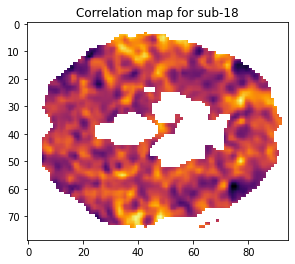

In [11]:
# subject to show: [0] to [21]
subjectIndex = 0

# language model to display: [1] for GPT-2, [2] for Transformer-XL
LanguageModelIndex = 1

# slice to display: [0](bottom of brain) to [67](top of brain)
displaySlice = 26 


displayCorrelation = numpy.array(allCorrelations[subjectIndex][LanguageModelIndex])
subjectNumber = allCorrelations[subjectIndex][0]

plt.title("Correlation map for " + subjectNumber)
plt.imshow(displayCorrelation[:,:,displaySlice], cmap='inferno')

# T test
This cell will calculate the t score and p value for each langauge model, collating them into the 4 arrays shown in lines 2-5

In [6]:
# Hold the results from the T test
tScoreMatrixGPT2 = []
tScoreMatrixTransformerXL = []
pValuesMatrixGPT2 = []
pValuesMatrixTransformerXL = []

# language model to test: [1] for GPT-2, [2] for Transformer-XL
LanguageModelIndex = 1

# Hold max looping values, for looping through each voxel & subject
numOfSubjects = len(allCorrelations)
iMax = len(allCorrelations[0][1])
jMax = len(allCorrelations[0][1][0])
kMax = len(allCorrelations[0][1][0][0])


for i in range(iMax):
  iArrayTScoreGPT2 = []
  iArrayTScoreTransformerXL = []
  iArrayPValuesGPT2 = []
  iArrayPValuesTransformerXL = []

  for j in range(jMax):
    jArrayTScoreGPT2 = []
    jArrayTScoreTransformerXL = []
    jArrayPValuesGPT2 = []
    jArrayPValuesTransformerXL = []
    
    for k in range(kMax):
      voxelValuesGPT2 = []
      voxelValuesTransformerXL = []

      for imageIndex in range(numOfSubjects):
        voxelValuesGPT2.append(allCorrelations[imageIndex][1][i][j][k])
        voxelValuesTransformerXL.append(allCorrelations[imageIndex][2][i][j][k])

      tScoreGPT2, pValueGPT2 = ttest_1samp(voxelValuesGPT2, popmean=0, alternative='greater')
      tScoreTransformerXL, pValueTransformerXL = ttest_1samp(voxelValuesTransformerXL, popmean=0, alternative='greater')

      jArrayTScoreGPT2.append(tScoreGPT2)
      jArrayTScoreTransformerXL.append(tScoreTransformerXL)
      jArrayPValuesGPT2.append(pValueGPT2)
      jArrayPValuesTransformerXL.append(pValueTransformerXL)

    iArrayTScoreGPT2.append(jArrayTScoreGPT2)
    iArrayTScoreTransformerXL.append(jArrayTScoreTransformerXL)
    iArrayPValuesGPT2.append(jArrayPValuesGPT2)
    iArrayPValuesTransformerXL.append(jArrayPValuesTransformerXL)

  tScoreMatrixGPT2.append(iArrayTScoreGPT2)
  tScoreMatrixTransformerXL.append(iArrayTScoreTransformerXL)
  pValuesMatrixGPT2.append(iArrayPValuesGPT2)
  pValuesMatrixTransformerXL.append(iArrayPValuesTransformerXL)

# Display T-test Results

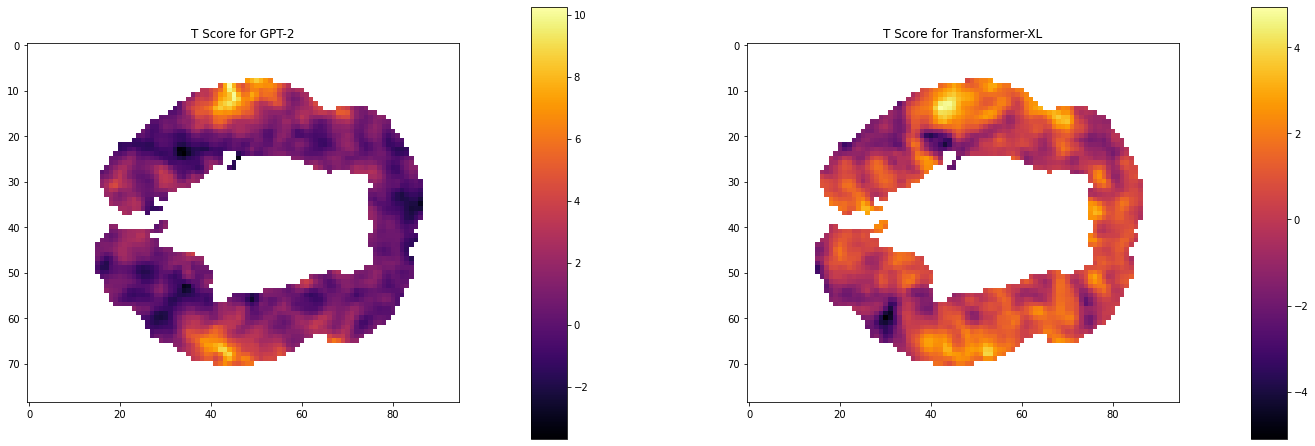

In [7]:
arrayGPT2 = numpy.array(tScoreMatrixGPT2)
arrayTransformerXL = numpy.array(tScoreMatrixTransformerXL)
selectedSlice = 23

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_axes([0,0,0.6,0.9])
ax1.set_title("T Score for GPT-2")
i = ax1.imshow(arrayGPT2[:, :, selectedSlice], cmap='inferno')

colorbar_ax1 = fig.add_axes([0.7, 0.15, 0.05, 0.6])
fig.colorbar(i, cax=colorbar_ax1)

ax2 = fig.add_axes([1,0,0.6,0.9])
ax2.set_title("T Score for Transformer-XL")
i2 = ax2.imshow(arrayTransformerXL[:, :, selectedSlice], cmap='inferno')

colorbar_ax2 = fig.add_axes([1.7, 0.15, 0.05, 0.6])
fig.colorbar(i2, cax=colorbar_ax2)

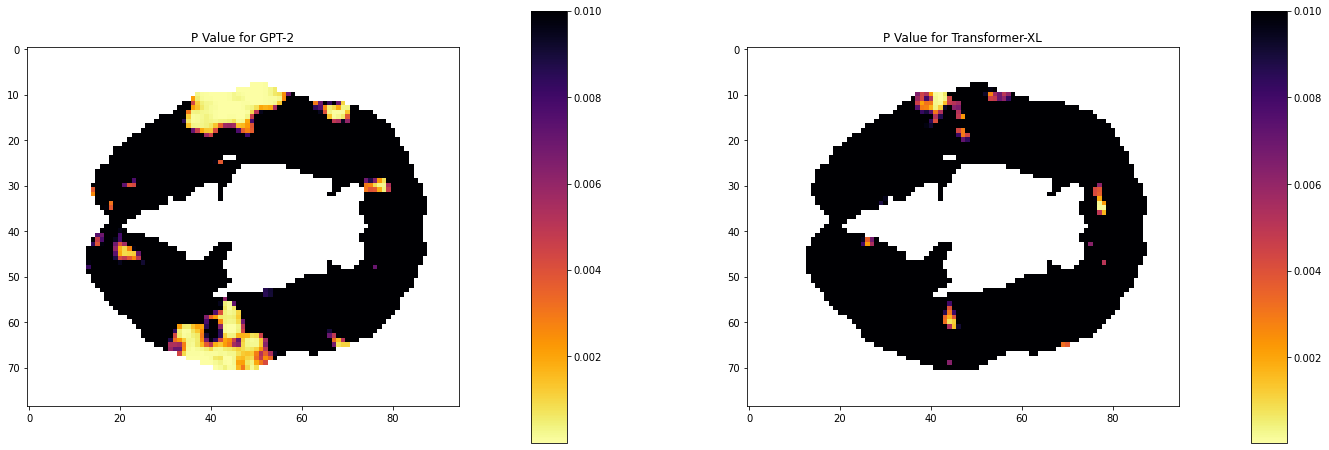

In [ ]:
arrayGPT2 = numpy.array(pValuesMatrixGPT2)
arrayTransformerXL = numpy.array(pValuesMatrixTransformerXL)
selectedSlice = 26


iMax = len(arrayGPT2)
jMax = len(arrayGPT2[0])
kMax = len(arrayGPT2[0][0])
threshold = 0.01

for i in range(iMax):
  for j in range(jMax):
    for k in range(kMax):
      if arrayGPT2[i, j, k] > threshold:
        arrayGPT2[i, j, k] = threshold

      if arrayTransformerXL[i, j, k] > threshold:
        arrayTransformerXL[i, j, k] = threshold


fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_axes([0,0,0.6,0.9])
ax1.set_title("P Value for GPT-2")
i = ax1.imshow(arrayGPT2[:, :, selectedSlice], cmap='inferno_r')

colorbar_ax1 = fig.add_axes([0.7, 0.15, 0.05, 0.6])
fig.colorbar(i, cax=colorbar_ax1)

ax2 = fig.add_axes([1,0,0.6,0.9])
ax2.set_title("P Value for Transformer-XL")
i2 = ax2.imshow(arrayTransformerXL[:, :, selectedSlice], cmap='inferno_r')

colorbar_ax2 = fig.add_axes([1.7, 0.15, 0.05, 0.6])
fig.colorbar(i2, cax=colorbar_ax2)

# Locate largest value
This is a function to locate & state the value of the largest t score or p value from either of the langauge models.

In [ ]:
# Set array to use
array = tScoreMatrixTransformerXL


iMax = len(array)
jMax = len(array[0])
kMax = len(array[0][0])
numpyArray = numpy.array(array)

maxValue = numpy.nanmax(numpyArray[:, :, 20])
breakLoop = False


# Loop 1. Use if looking at the TScore overall overall

maxValue = numpy.nanmax(numpyArray)

for i in range(iMax):
  for j in range(jMax):
    for k in range(kMax):
      if array[i][j][k] == maxValue:
        breakLoop = True
      if breakLoop:
        break
    if breakLoop:
      break
  if breakLoop:
    break



# # Loop 2. Use if looking for a particular slice

# # Set slice value (k)
# k = 20
# maxValue = numpy.nanmax(numpyArray[:, :, k])

# for i in range(iMax):
#   for j in range(jMax):
#     if array[i][j][k] == maxValue:
#       breakLoop = True
#     if breakLoop:
#       break
#   if breakLoop:
#     break


# Print position
if breakLoop:
  print("Value: ", maxValue)
  print("i: ", i)
  print("j: ", j)
  print("k: ", k)

Value:  5.006255922779242
i:  11
j:  42
k:  26
